In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator
from scipy.integrate import simpson

In [2]:
City = 1e6
Jail = 2000
Total = Jail + City 

with open('Solutions/Model0.pkl', 'rb') as f:
    Model0 = pickle.load(f)

with open('Solutions/Model1.pkl', 'rb') as f:
    Model1 = pickle.load(f)

with open('Solutions/Model2.pkl', 'rb') as f:
    Model2 = pickle.load(f)

with open('Solutions/Model3.pkl', 'rb') as f:
    Model3 = pickle.load(f)

with open('Solutions/Model4.pkl', 'rb') as f:
    Model4 = pickle.load(f)
    
Models = [Model0,Model1,Model2,Model3,Model4]

In [3]:
for m in Models:
    print(m["Sol_opt"].success)

True
True
True
True
True


In [4]:
cols =  ['Nj0', 'Nc0', 'Betac', 'Betaj', 'gamma', 'ucj0', 'ujc0', 'Ic0', 'Ij0', 'ai', 'au', "delta_I"]
df = pd.DataFrame(columns = cols)
rows = []
for m in Models:
    row = {col: m.get(col, None) for col in cols}
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Nj0,Nc0,Betac,Betaj,gamma,ucj0,ujc0,Ic0,Ij0,ai,au,delta_I
0,0.200000,0.800000,0.2625,1.000,0.071429,0.2500,1.00,0.000010,1.000000e-05,20,1.00,0.422713
1,0.001996,0.998004,0.2625,0.525,0.053900,0.0003,0.15,0.000499,9.980040e-07,210,0.55,0.001091
2,0.001996,0.998004,0.2625,1.790,0.053900,0.0003,0.15,0.000499,9.980040e-07,650,0.95,0.000622
3,0.001996,0.998004,0.2625,0.525,0.053900,0.0005,0.25,0.000499,9.980040e-07,400,0.80,0.001257
4,0.001996,0.998004,0.2625,1.790,0.053900,0.0005,0.25,0.000499,9.980040e-07,300,0.80,0.001475


In [5]:
plt.rcParams.update({
    'font.size' : 15,
    "lines.linewidth": 2,
    "font.family":"arial",
    #"font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "cm",
    "mathtext.default": "rm",
    "mathtext.rm"  : "arial",
        })

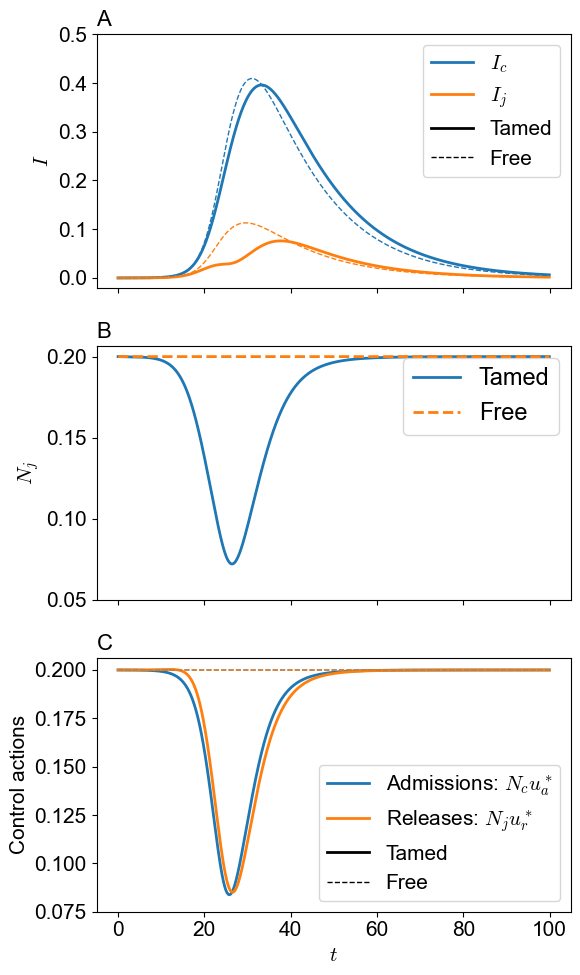

In [6]:
model = Models[0]

time = model["Sol_opt"].x
t_max = 100
mask = time <= t_max
Ic_opt =  model["Sol_opt"].y[1][mask]
Ij_opt =  model["Sol_opt"].y[4][mask]
Ic_free =  model["Sol_free"].y[1][mask]
Ij_free =  model["Sol_free"].y[4][mask]
Nj_opt = np.sum(model["Sol_opt"].y[[3,4,5]], axis=0)[mask]
Nc_opt = np.sum(model["Sol_opt"].y[[0,1,2]], axis=0)[mask]
Nj_free = np.sum(model["Sol_free"].y[[3,4,5]], axis=0)[mask]
Nc_free = np.sum(model["Sol_free"].y[[0,1,2]], axis=0)[mask]
Admissions_opt = Nc_opt * model["u_cj_t"][mask]
Admissions_free = Nc_free * model["ucj0"]
Releases_opt = Nj_opt * model["u_jc_t"][mask]
Releases_free = Nj_free * model["ujc0"]

I_opt = Ic_opt + Ij_opt
I_free = Ic_free + Ij_free
time = time[mask]

fig, axs = plt.subplots(3, 1, figsize=(6, 10), sharex=True)

axs[0].plot(time, Ic_opt, lw=2, linestyle="-", color="C0")
axs[0].plot(time, Ij_opt, lw=2, linestyle="-", color="C1")
axs[0].plot(time, Ic_free, lw=1, linestyle="--", color="C0")
axs[0].plot(time, Ij_free, lw=1, linestyle="--", color="C1")

legend_elements_A = [
    Line2D([0], [0], color="C0", lw=2, label=r"$\it{I_c}$"),
    Line2D([0], [0], color="C1", lw=2, label=r"$\it{I_j}$"),
    Line2D([0], [0], color="black", linestyle="-", lw=2, label="Tamed"),
    Line2D([0], [0], color="black", linestyle="--", lw=1, label="Free"),
]

axs[0].set_ylabel(r"$\it{I}$")
axs[0].set_ylim(top=0.5)
axs[0].legend(handles=legend_elements_A, fontsize=15)
axs[0].set_title("A", loc='left', fontsize=16)

axs[1].plot(time, Nj_opt, label="Tamed")
axs[1].plot(time, Nj_free, linestyle="--", label="Free")
axs[1].set_ylabel(r"$\it{N_j}$")
axs[1].set_ylim(bottom=0.05)
axs[1].legend(fontsize=17)
axs[1].set_title("B", loc='left', fontsize=16)

axs[2].plot(time, Admissions_opt, lw=2, linestyle="-", color="C0")
axs[2].plot(time, Releases_opt, lw=2, linestyle="-", color="C1")
axs[2].plot(time, Admissions_free, lw=1, linestyle="--", color="C0")
axs[2].plot(time, Releases_free, lw=1, linestyle="--", color="C1")

legend_elements = [
    Line2D([0], [0], color="C0", lw=2, label=r"Admissions: $\it{N_c u_{a}^*}$"),
    Line2D([0], [0], color="C1", lw=2, label=r"Releases: $\it{N_j u_{r}^*}$"),
    Line2D([0], [0], color="black", linestyle="-", lw=2, label="Tamed"),
    Line2D([0], [0], color="black", linestyle="--", lw=1, label="Free"),
]

axs[2].set_xlabel(r"$\it{t}$")
axs[2].set_ylabel("Control actions")
axs[2].set_ylim(bottom=0.075)
axs[2].legend(handles=legend_elements, fontsize=15)
axs[2].set_title("C", loc='left', fontsize=16)

plt.tight_layout()
plt.savefig("Results/Model0.pdf", bbox_inches="tight")
plt.show()

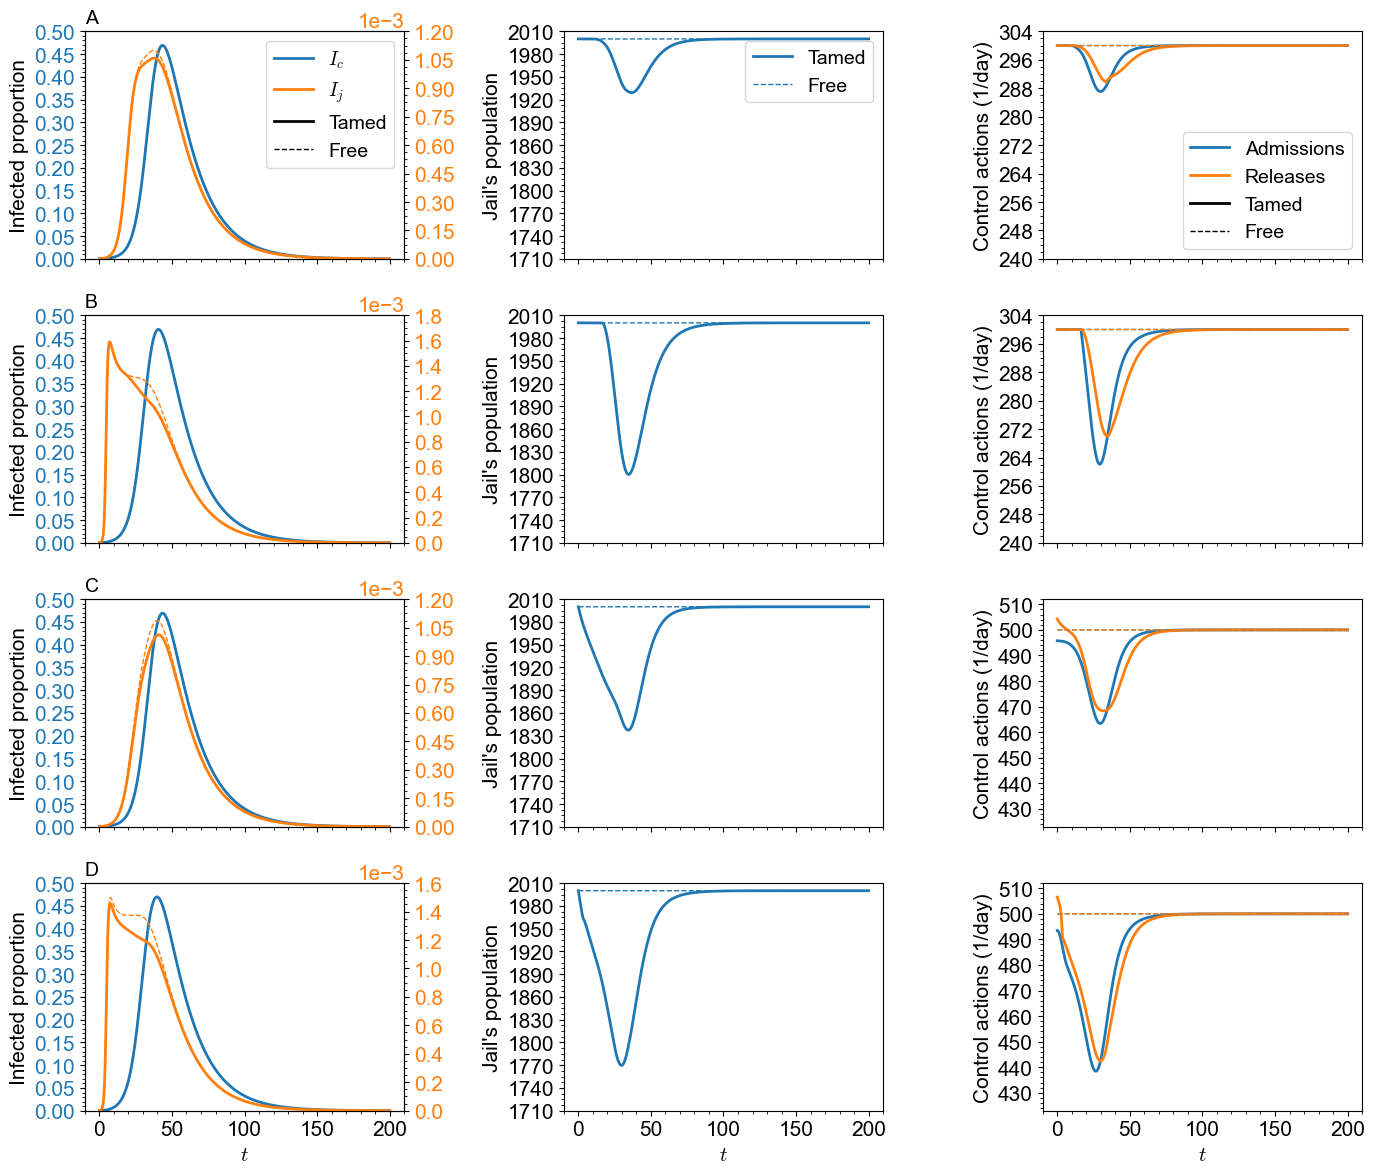

In [7]:
def use_sci_notation(data, threshold_low=1e-2, threshold_high=1e4):
    data = np.array(data)
    max_val = np.max(np.abs(data))
    # Use sci notation if very small or very large
    return max_val != 0 and (max_val < threshold_low or max_val > threshold_high)

fig, axs = plt.subplots(4, 3, figsize=(14, 12), sharex='col')
t_max = 200
letters = 'ABCD'  # Only 4 rows, so just 4 letters

for idx, model in enumerate(Models[1:]):  # Models[1:] only
    time = model["Sol_opt"].x
    mask = time <= t_max
    time = time[mask]

    Ic_opt = model["Sol_opt"].y[1][mask]
    Ij_opt = model["Sol_opt"].y[4][mask]
    Ic_free =  model["Sol_free"].y[1][mask]
    Ij_free =  model["Sol_free"].y[4][mask]
    Nj_opt = Total*np.sum(model["Sol_opt"].y[[3, 4, 5]], axis=0)[mask]
    Nc_opt = Total*np.sum(model["Sol_opt"].y[[0, 1, 2]], axis=0)[mask]
    Nj_free = Total*np.sum(model["Sol_free"].y[[3, 4, 5]], axis=0)[mask]
    Nc_free = Total*np.sum(model["Sol_free"].y[[0, 1, 2]], axis=0)[mask]
    Admissions_opt = Nc_opt * model["u_cj_t"][mask]
    Admissions_free = Nc_free * model["ucj0"]
    Releases_opt = Nj_opt * model["u_jc_t"][mask]
    Releases_free = Nj_free * model["ujc0"]

    axA = axs[idx, 0]
    
    axA.plot(time, Ic_opt,  lw=2, linestyle="-",  color="C0", label=r"$\it{I_c}$")           # tamed
    axA.plot(time, Ic_free, lw=1, linestyle="--", color="C0")                                # NEW – free
    
    axA.set_ylabel("Infected proportion")
    axA.tick_params(axis='y', labelcolor='C0')
    axA.set_title(f"{letters[idx]}", loc='left', fontsize=14)
    axA.minorticks_on()
    axA.ticklabel_format(axis='x', style='plain')
    axA.xaxis.get_offset_text().set_visible(False)
    
    axA.yaxis.set_major_locator(MaxNLocator(min_n_ticks=4))
    yticks_A = axA.get_yticks()
#     axA.set_ylim(yticks_A[0], yticks_A[-1])
    axA.set_ylim([0,0.5])

    
    axA_twin = axA.twinx()
    axA_twin.plot(time, Ij_opt,  lw=2, linestyle="-",  color="C1", label=r"$\it{I_j}$")      # tamed
    axA_twin.plot(time, Ij_free, lw=1, linestyle="--", color="C1")                           # NEW – free
    
    # axA_twin.set_ylabel(r"$\it{I_j}$", color="C1")
    axA_twin.tick_params(axis='y', labelcolor='C1')
    axA_twin.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    axA_twin.minorticks_on()
    axA_twin.ticklabel_format(axis='x', style='plain')
    axA_twin.xaxis.get_offset_text().set_visible(False)
    
    axA_twin.yaxis.set_major_locator(MaxNLocator(min_n_ticks=4))
    yticks_A_t = axA_twin.get_yticks()
#     axA_twin.set_ylim(yticks_A_t[0], yticks_A_t[-1])
    axA_twin.set_ylim(0, yticks_A_t[-1])
    
    if idx == 0:
        legend_elements_A = [
            Line2D([0], [0], lw=2, color="C0", label=r"$\it{I_c}$"),
            Line2D([0], [0], lw=2, color="C1", label=r"$\it{I_j}$"),
            Line2D([0], [0], lw=2, color="black", linestyle="-",  label="Tamed"),
            Line2D([0], [0], lw=1, color="black", linestyle="--", label="Free"),
        ]
        # put the legend on the twin axis so both handle sets live in the same box
        axA_twin.legend(handles=legend_elements_A, fontsize=14, loc="upper right")

    # --- Column 1: Plot B (Nj opt & free) ---
    axB = axs[idx, 1]
    axB.plot(time, Nj_opt, label="Tamed", lw=2, color="C0")
    axB.plot(time, Nj_free, linestyle="--", label="Free", lw=1, color="C0")
    axB.set_ylabel("Jail's population")
    axB.minorticks_on()
    axB.ticklabel_format(axis='x', style='plain')
    axB.xaxis.get_offset_text().set_visible(False)
    axB.set_title("")

    if use_sci_notation(np.concatenate([Nj_opt, Nj_free])):
        axB.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
        axB.yaxis.get_offset_text().set_visible(True)
    else:
        axB.ticklabel_format(axis='y', style='plain')
        axB.yaxis.get_offset_text().set_visible(False)

    axB.yaxis.set_major_locator(MaxNLocator(min_n_ticks=4))
    yticks_B = axB.get_yticks()
#     axB.set_ylim(yticks_B[0], yticks_B[-1])
    axB.set_ylim([1710, 2010])

    if idx == 0:
        axB.legend(fontsize=14)

    # --- Column 2: Plot C (Admissions & Releases) ---
    axC = axs[idx, 2]
    axC.plot(time, Admissions_opt, lw=2, linestyle="-", color="C0")
    axC.plot(time, Releases_opt, lw=2, linestyle="-", color="C1")
    axC.plot(time, Admissions_free, lw=1, linestyle="--", color="C0")
    axC.plot(time, Releases_free, lw=1, linestyle="--", color="C1")
    axC.set_ylabel("Control actions (1/day)")
    axC.minorticks_on()
    axC.ticklabel_format(axis='x', style='plain')
    axC.xaxis.get_offset_text().set_visible(False)
    axC.set_title("")

    combined_data = np.concatenate([Admissions_opt, Admissions_free, Releases_opt, Releases_free])
    if use_sci_notation(combined_data):
        axC.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
        axC.yaxis.get_offset_text().set_visible(True)
    else:
        axC.ticklabel_format(axis='y', style='plain')
        axC.yaxis.get_offset_text().set_visible(False)

    axC.yaxis.set_major_locator(MaxNLocator(min_n_ticks=4))
    yticks_C = axC.get_yticks()
    
    if idx == 0 or idx == 1: axC.set_ylim(240, 304)
    else: axC.set_ylim(423, 512)

    if idx == 0:
        legend_elements_C = [
            Line2D([0], [0], color="C0", lw=2, label=r"Admissions"),
            Line2D([0], [0], color="C1", lw=2, label=r"Releases"),
            Line2D([0], [0], color="black", linestyle="-", lw=2, label="Tamed"),
            Line2D([0], [0], color="black", linestyle="--", lw=1, label="Free"),
        ]
        axC.legend(handles=legend_elements_C, fontsize=14, loc="lower right")

for ax in axs[-1, :]:
    ax.set_xlabel(r"$\it{t}$")
    ax.ticklabel_format(axis='x', style='plain')
    ax.xaxis.get_offset_text().set_visible(False)

plt.tight_layout(w_pad=0.5)
plt.subplots_adjust(wspace=0.5)
plt.savefig("Results/AllModels_1to4.pdf", bbox_inches="tight")
plt.show()

In [8]:
for i in range(1,5):
    model = Models[i]
    I_opt_peak = (model["Sol_opt"].y[1]+ model["Sol_opt"].y[4]).max()
    I_free_peak = (model["Sol_free"].y[1]+model["Sol_free"].y[4]).max()
    print(i, Total*(I_free_peak-I_opt_peak))

1 45.059649713861006
2 53.56543689587667
3 45.442513514634356
4 113.80344630482264
